In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import regularizers
import cv2

In [ ]:
print("TensorFlow Version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.16.1
Is GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
base_dir = '/tf/lab_1/data_batik/training_101/'

In [ ]:
data_batik = os.listdir(base_dir)

In [ ]:
def train_val_datasets():
    training_dataset = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        subset='training',
        validation_split=0.2,
        seed=42,
        batch_size=32,
        image_size=(256, 256),
		label_mode='categorical',
        color_mode = "rgb",
        shuffle=True,
    )

    testing_dataset = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        subset='validation',
        validation_split=0.2,
        seed=42,
        batch_size=32,
        image_size=(256, 256),
		label_mode='categorical',
        color_mode = "rgb",
    )

    return training_dataset, testing_dataset

In [ ]:
training_dataset, testing_dataset = train_val_datasets()

Found 808 files belonging to 8 classes.
Using 647 files for training.
Found 808 files belonging to 8 classes.
Using 161 files for validation.


In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Cek detail GPU
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    print("GPU Details:", gpu)

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Details: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
Fill_mode = 'reflect'
agumentation_layer = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1, fill_mode=Fill_mode),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode=Fill_mode)
])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    agumentation_layer,
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(512, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,876,840 (7.16 MB)

 Trainable params: 1,876,840 (7.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(training_dataset, validation_data=testing_dataset, epochs=50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1423 - loss: 2.0872 - val_accuracy: 0.1491 - val_loss: 2.0764
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1692 - loss: 2.0752 - val_accuracy: 0.1242 - val_loss: 2.0726
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1834 - loss: 2.0638 - val_accuracy: 0.1739 - val_loss: 2.0428
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2049 - loss: 2.0280 - val_accuracy: 0.1863 - val_loss: 2.0909
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2245 - loss: 1.9842 - val_accuracy: 0.2050 - val_loss: 1.9226
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2580 - loss: 1.9249 - val_accuracy: 0.2174 - val_loss: 2.0079
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2739 - loss: 1.9100 - val_accuracy: 0.2360 - val_loss: 1.9236
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2620 - loss: 1.8948 - val_accuracy: 0.2609 - v

In [ ]:
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1),
        tf.keras.layers.RandomTranslation(0.1, 0.1),
    ])

In [ ]:
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.Input(shape=(256, 256, 3)),
    agumentation_layer,
    tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, 7, strides=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, 7, strides=2, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(1024, 5, strides=2, padding='same',activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])


In [ ]:
# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


In [ ]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 512)      │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,156,488 (15.86 MB)

 Trainable params: 4,156,488 (15.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_2.fit(training_dataset, validation_data=testing_dataset, epochs=50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.1139 - loss: 6.6254 - val_accuracy: 0.1429 - val_loss: 2.1105
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1177 - loss: 2.1031 - val_accuracy: 0.1677 - val_loss: 2.0716
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1522 - loss: 2.0573 - val_accuracy: 0.2360 - val_loss: 2.0523
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1928 - loss: 2.0505 - val_accuracy: 0.1988 - val_loss: 2.0221
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2003 - loss: 2.0070 - val_accuracy: 0.2112 - val_loss: 1.9907
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1968 - loss: 1.9916 - val_accuracy: 0.2050 - val_loss: 2.0063
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2319 - loss: 1.9895 - val_accuracy: 0.2174 - val_loss: 2.0087
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2422 - loss: 1.9582 - val_accuracy: 0.1677 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted label: Batik Truntum


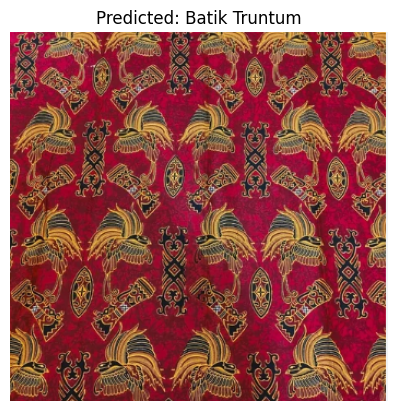

In [ ]:
class_name = {
    'Batik Cendrawasih': 0,
    'Batik Dayak': 1,
    'Batik Geblek Renteng': 2,
    'Batik Megamendung': 3,
    'Batik Parang': 4,
    'Batik Pring Sedawung': 5,
    'Batik Tambal': 6,
    'Batik Truntum': 7
}

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)

    # Rescaling gambar (nilai pixel dari 0-255 menjadi 0-1)
    img_array = img_array / 255.0

    # Menambah dimensi untuk batch (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array


# Gambar yang ingin diprediksi
img_path = '/tf/lab_1/test_data.png'

# Memuat dan memproses gambar
img_array = load_and_preprocess_image(img_path)

# Melakukan prediksi
predictions = model.predict(img_array)

# Menampilkan hasil prediksi
predicted_class = np.argmax(predictions, axis=1)  # Mendapatkan kelas dengan probabilitas tertinggi

# Mendapatkan nama kelas berdasarkan indeks
predicted_label = [key for key, value in class_name.items() if value == predicted_class[0]][0]

print(f'Predicted label: {predicted_label}')

# Menampilkan gambar yang diprediksi
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


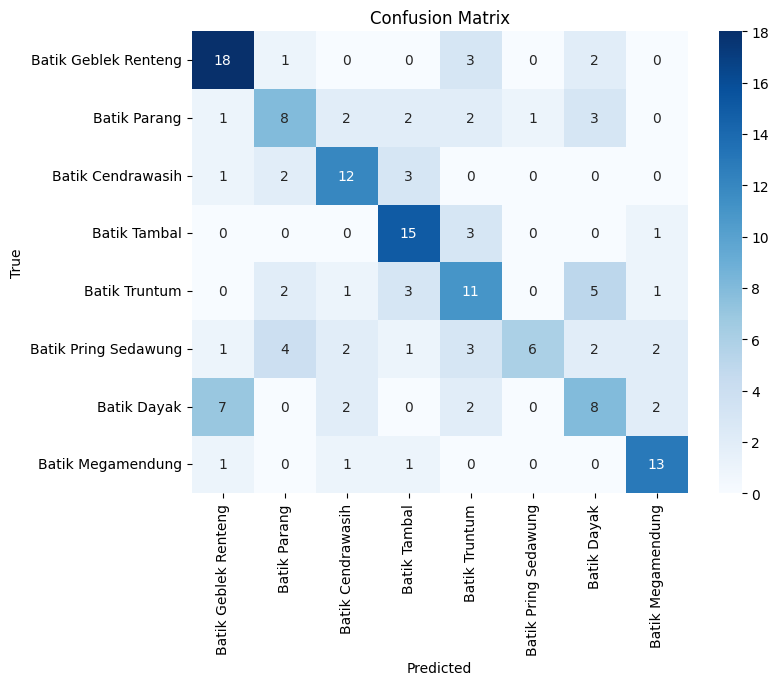

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = []
predicted_labels = []

for images, labels in testing_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data_batik, yticklabels=data_batik)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras import regularizers

model_augmen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    data_augmentation,

    # Regularisasi L2 pada Conv2D
    tf.keras.layers.Conv2D(16, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(512, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(1024, 7, padding='same', activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='tanh',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='tanh',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1024, activation='tanh',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),

    # Output layer untuk klasifikasi 8 kelas
    tf.keras.layers.Dense(8, activation='softmax')
])

# Kompilasi model dengan Adam optimizer dan categorical crossentropy loss function
model_augmen.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # Loss function untuk multi-kelas
    metrics=['accuracy']
)


In [ ]:
model_augmen.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 1024)     │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 32,194,728 (122.81 MB)

 Trainable params: 32,161,960 (122.69 MB)

 Non-trainable params: 32,768 (128.00 KB)

In [ ]:
model_augmen.fit(training_dataset, validation_data=testing_dataset, epochs=50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.1884 - loss: 23.5368 - val_accuracy: 0.1739 - val_loss: 22.3032
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.1856 - loss: 21.9278 - val_accuracy: 0.2112 - val_loss: 20.8613
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2997 - loss: 20.4252 - val_accuracy: 0.1491 - val_loss: 19.6646
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2472 - loss: 19.2392 - val_accuracy: 0.2795 - val_loss: 18.6388
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3168 - loss: 18.1976 - val_accuracy: 0.2050 - val_loss: 17.7295
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2715 - loss: 17.3887 - val_accuracy: 0.2981 - val_loss: 16.9059
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3260 - loss: 16.4666 - val_accuracy: 0.2112 - val_loss: 16.1620
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3275 - loss: 15.7930 - val_acc

In [ ]:
from tensorflow.keras.applications import ResNet50


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model_transfer = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='softmax')
])


In [ ]:
model_transfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_transfer.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model_transfer.fit(
    training_dataset,
    validation_data=testing_dataset,
    epochs=10
)

Epoch 1/10


I0000 00:00:1733650138.299972     302 service.cc:145] XLA service 0x78e0fc0019c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733650138.300164     302 service.cc:153]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
I0000 00:00:1733650152.809404   41376 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_17045', 184 bytes spill stores, 524 bytes spill loads

I0000 00:00:1733650153.121208   41363 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_21708', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1733650171.819945     302 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3769 - loss: 1.7526 - val_accuracy: 0.6398 - val_loss: 1.1130
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9434 - loss: 0.2660 - val_accuracy: 0.7702 - val_loss: 0.7227
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9682 - loss: 0.1031 - val_accuracy: 0.8696 - val_loss: 0.3860
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9886 - loss: 0.0442 - val_accuracy: 0.9193 - val_loss: 0.2669
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9901 - loss: 0.0553 - val_accuracy: 0.9006 - val_loss: 0.2352
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9851 - loss: 0.0370 - val_accuracy: 0.9441 - val_loss: 0.1744
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9959 - loss: 0.0200 - val_accuracy: 0.9317 - val_loss: 0.1801
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9951 - loss: 0.0216 - val_accuracy: 0.9193 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: Batik Parang


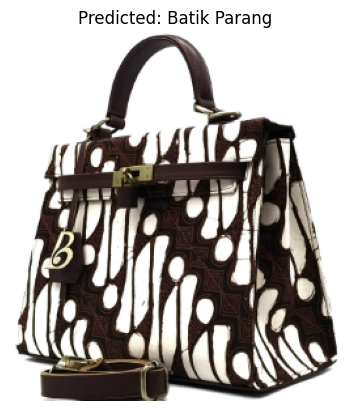

In [ ]:
class_name = {
    'Batik Cendrawasih': 0,
    'Batik Dayak': 1,
    'Batik Geblek Renteng': 2,
    'Batik Megamendung': 3,
    'Batik Parang': 4,
    'Batik Pring Sedawung': 5,
    'Batik Tambal': 6,
    'Batik Truntum': 7
}

def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    return img_array


img_path = '/tf/lab_1/test_7.png'

img_array = load_and_preprocess_image(img_path)

predictions = model_transfer.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)

predicted_label = [key for key, value in class_name.items() if value == predicted_class[0]][0]

print(f'Predicted label: {predicted_label}')

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()


In [ ]:
model_transfer.save('model_resnet.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


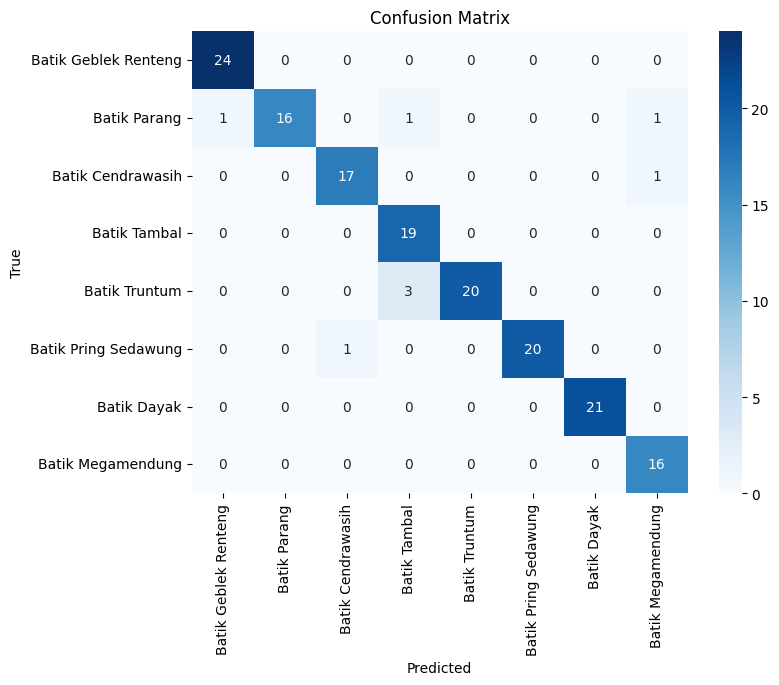

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil true labels dan predicted labels dari dataset pengujian
true_labels = []
predicted_labels = []

for images, labels in testing_dataset:
    predictions = model_transfer.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data_batik, yticklabels=data_batik)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
